# 第6章 图像的几何变换

In [1]:
#导入本章示例所用到的包,使用本文档中示例,先运行一次本段代码
#-*- coding: utf-8 -*-
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['STSong'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from skimage import color,io,util,transform
from scipy import ndimage
%matplotlib inline

### OpenCV几何变换函数
- dst=cv.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]);图像缩放 Resizes an image.
- dst=cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]);Applies an affine transformation to an image.
- dst=cv.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]);Applies a perspective transformation to an image.

- retval=cv.getRotationMatrix2D(center, angle, scale);Calculates an affine matrix of 2D rotation.
- retval=cv.getAffineTransform(src, dst); Calculates an affine transform from three pairs of the corresponding points.

- retval=cv.getPerspectiveTransform(src, dst[, solveMethod]); Calculates a perspective transform from four pairs of the corresponding points.

- iM=cv.invertAffineTransform(M[, iM]); Inverts an affine transformation matrix.
- dst=cv.remap(src, map1, map2, interpolation[, dst[, borderMode[, borderValue]]]); Applies a generic geometrical transformation to an image.

### Scikit-image几何变换函数
- transform.rescale(image, scale, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, multichannel=False, anti_aliasing=None, anti_aliasing_sigma=None); Scale image by a certain factor.
- transform.resize(image, output_shape, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=None, anti_aliasing_sigma=None);Resize image to match a certain size.
- transform.rotate(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False); Rotate image by a certain angle around its center.
- transform.swirl(image, center=None, strength=1, radius=100, rotation=0, output_shape=None, order=None, mode='reflect', cval=0, clip=True, preserve_range=False); Perform a swirl transformation.
- transform.warp(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False);Warp an image according to a given coordinate transformation.
- class skimage.transform.AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=None); 2D affine transformation.
- class skimage.transform.ProjectiveTransform(matrix=None); Projective transformation.
- class skimage.transform.PiecewiseAffineTransform; D piecewise affine transformation.

## 6.3 图像的基本几何变换

### 6.3.5 图像基本几何变换的编程实现

### 1. 采用OpenCV提供的几何变换函数
### 示例：图像平移 Translation transformation


In [ ]:
#采用OpenCV中的仿射函数cv.warpAffine进行图像平移

#读取一幅彩色图像
img = cv.imread('./imagedata/baboon.jpg',1)

#获取图像的高、宽
rows,cols = img.shape[0:2]

#构造平移变换矩阵，将图像右移100像素、下移50像素
M = np.array([[1,0,100.0],[0,1,50.0]])
#调用仿射变换函数对图像进行平移变换
imgdst = cv.warpAffine(img,M,dsize=(cols,rows))

#显示结果
plt.figure(figsize=(10,6))

#原图像
plt.subplot(1,2,1); plt.imshow(img[:,:,::-1])
plt.title('baboon original') 
#平移变换结果
plt.subplot(1,2,2); plt.imshow(imgdst[:,:,::-1])
plt.title('Translation')  

plt.show()

### 示例：图像缩放 Scaling transformation

In [ ]:
#OpenCV:图像缩放

#读取一幅彩色图像
img = io.imread('./imagedata/baboon.jpg')

#按给定的缩放比例因子调整图像大小，默认双线性插值cv.INTER_LINEAR
imgbig= cv.resize(img,dsize=(0,0),fx=1.5, fy=1)

#按给定的图像尺寸调整图像大小，采用最近邻插值cv.INTER_NEAREST
width = 250; height = 300
imgsmall=cv.resize(img,dsize=(width,height),interpolation=cv.INTER_NEAREST)

#显示结果
plt.figure(figsize=(16,8))

#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('baboon original') 
#按给定的缩放因子调整图像大小
plt.subplot(1,3,2); plt.imshow(imgbig)
plt.title('bigger image, resize by the scale factor') 
#按给定的图像尺寸调整图像大小
plt.subplot(1,3,3); plt.imshow(imgsmall)
plt.title('smaller image, resize to match a certain size') 

plt.show()

### 示例：图像旋转 Rotation transformation

In [ ]:
#OpenCV:图像旋转

#读入一幅彩色图像
img = cv.imread('./imagedata/baboon.jpg',cv.IMREAD_COLOR)

#将色序有BGR调整为RGB
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#获取图像的高、宽
rows,cols=img.shape[0:2]

#构建旋转变换矩阵，指定旋转中心，旋转角度，旋转后的缩放因子
#绕图像中心，将图像逆时针旋转45度，不改变输出图像大小
M1 = cv.getRotationMatrix2D(center=(cols/2,rows/2), angle=45, scale=1)
#采用仿射变换进行图像旋转,边缘处背景设为亮灰色
imgdst1 = cv.warpAffine(img,M1,dsize=(cols,rows),borderValue =(200,200,200))

#绕图像中心，将图像顺时针旋转60度，改变输出图像大小
M2 = cv.getRotationMatrix2D(center=(cols/2,rows/2), angle=-60, scale=0.7)
#采用仿射变换进行图像旋转,边缘处背景设为亮灰色
imgdst2 = cv.warpAffine(img,M2,dsize=(cols,rows),borderValue =(220,220,220))

#显示结果
plt.figure(figsize=(16,6)) #设置窗口大小(宽,高)

plt.subplot(1,3,1);  plt.imshow(img)
plt.title('Original image') 
#plt.axis('off')

plt.subplot(1,3,2);  plt.imshow(imgdst1)
plt.title('Rotated 45 degree by OpenCV') 
#plt.axis('off')

plt.subplot(1,3,3);  plt.imshow(imgdst2)
plt.title('Rotated -60 degree and resize by OpenCV') 
#plt.axis('off')

plt.show()
#-----------------------

### 剪切变换 Shear transformation

In [ ]:
#OpenCV:剪切变换 Shear transformation

#读入图像
img = io.imread('./imagedata/camera.png')

#设定剪切系数
br = bc = 0.25

#沿列方向(水平),构建剪切变化矩阵
mat_hs = np.float32([[1,bc,0],[0,1,0]])
#确定输出图像大小
rows = img.shape[0]
cols = int(img.shape[1] + bc * img.shape[0] +1)
#采用仿射变换进行图像剪切,边缘处背景设为亮灰色
img_hs = cv.warpAffine(img,mat_hs,dsize=(cols,rows),borderValue =220)

#沿行方向(垂直),构造变换矩阵
mat_vs = np.float32([[1,0,0],[br,1,0]])
#确定输出图像大小
rows = np.int16(img.shape[0] + bc * img.shape[1] +1)
cols = img.shape[1]
#对图像施加上述变换
img_vs = cv.warpAffine(img,mat_vs,dsize=(cols,rows),borderValue =220)

#组合剪切变换,先列后行
mat_vhs = np.float32([[1,bc,0],[br,1,0]])
#确定输出图像大小
rows = np.int16(img.shape[0] + bc * img.shape[1] +1)
cols = np.int16(img.shape[1] + bc * img.shape[0] +1)
#对图像施加上述变换
img_vhs = cv.warpAffine(img,mat_vhs,dsize=(cols,rows),borderValue =220)

#显示结果
plt.figure(figsize=(16,8))
#原图像
plt.subplot(1,4,1); plt.imshow(img,cmap='gray')
plt.title('original image') 
#plt.axis('off')
#列方向剪切变换结果
plt.subplot(1,4,2); plt.imshow(img_hs,cmap='gray')
plt.title('col_shear transformation') 
#行方向剪切变换结果
plt.subplot(1,4,3); plt.imshow(img_vs,cmap='gray')
plt.title('row_shear transformation') 
#行列方向组合剪切变换结果
plt.subplot(1,4,4); plt.imshow(img_vhs,cmap='gray')
plt.title('col&row_shear transformation') 
plt.tight_layout()
plt.show()

### 2. 采用Scikit-image提供的几何变换函数

### 示例：图像平移

In [ ]:
#采用Scikit-image中的函数进行图像平移

#读取一幅彩色图像
img = io.imread('./imagedata/bigeyemonkey.jpg')
rows, cols = img.shape[0:2]

#构造平移变换矩阵，将图像右移100像素、下移50像素
tform = transform.AffineTransform(translation=(100,50))
#对图像施加上述组合变换，输出图像大小不变
imgout1 = transform.warp(img, tform.inverse, output_shape=None)

#改变输出图像大小以容纳完整图像
imgout2 = transform.warp(img, tform.inverse, output_shape=(rows+50,cols+100))


#显示结果
plt.figure(figsize=(12,6))

#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('baboon original') 
#输出图像大小不变
plt.subplot(1,3,2); plt.imshow(imgout1)
plt.title('Translation, Clipped')  
#输出图像大小调整
plt.subplot(1,3,3); plt.imshow(imgout2)
plt.title('Translation, Full')  

plt.show()

### 示例：图像缩放

In [ ]:
#采用Scikit-image中的函数进行图像缩放

#灰度图像
img_gray = io.imread('./imagedata/camera.png')
#彩色图像
img_rgb = io.imread('./imagedata/coffee.png')

#高宽同比例缩小
img_gray_small = transform.rescale(img_gray, 0.1)
#将数据类型由[]0,1]之间的浮点型转换为uint8
img_gray_small = util.img_as_ubyte(img_gray_small)

#宽度放大为1.5倍
img_rgb_big = transform.rescale(img_rgb,(1,1.5),multichannel=True)
#将数据类型由[0,1]之间的浮点型转换为uint8
img_rgb_big = util.img_as_ubyte(img_rgb_big)

#将图像缩放到指定尺寸
img_rgb_size = transform.resize(img_rgb,(250,300))
#将数据类型由[0,1]之间的浮点型转换为uint8
img_rgb_size = util.img_as_ubyte(img_rgb_size)

#显示图像尺寸
print('camera原图尺寸：',img_gray.shape)
print('camera小图尺寸：',img_gray_small.shape)
print('coffee原图尺寸：',img_rgb.shape)
print('coffee大图尺寸：',img_rgb_big.shape)
print('coffee指定尺寸：',img_rgb_size.shape)

#显示结果
plt.figure(figsize=(16,8))
#原灰度图像
plt.subplot(2,3,1); plt.imshow(img_gray,vmin=0,vmax=255,cmap='gray')
plt.title('camera original') 
#plt.axis('off')
#同比例缩小
plt.subplot(2,3,2); plt.imshow(img_gray_small,vmin=0,vmax=255,cmap='gray')
plt.title('camera smaller image, rescale') 
#原彩色图像
plt.subplot(2,3,4); plt.imshow(img_rgb)
plt.title('coffee original') 
#宽度放大
plt.subplot(2,3,5); plt.imshow(img_rgb_big)
plt.title('coffee bigger image, rescale') 
#指定尺寸
plt.subplot(2,3,6); plt.imshow(img_rgb_size)
plt.title('coffee image, resize to match a certain size') 

plt.show()

### 示例：图像旋转
- Rotate image by a certain angle around any point

In [ ]:
#采用Scikit-image中的函数rotate旋转图像
#读入图像
img = io.imread('./imagedata/chelsea.png')

#绕图像中心点逆时针旋转45度,放大图像尺寸
imgout1 = transform.rotate(img,45,resize=True)
#将数据类型转换为uint8
imgout1 = util.img_as_ubyte(imgout1)

#绕图像左上角像素(0,0)顺时针旋转30度,图像大小保持不变
imgout2 = transform.rotate(img,-30,center=(0,0))
#将数据类型转换为uint8
imgout2 = util.img_as_ubyte(imgout2)

#显示结果
plt.figure(figsize=(12,6))
#原图像
plt.subplot(1,3,1); plt.imshow(img)
plt.title('original image') 
#plt.axis('off')
#绕图像中心点逆时针旋转60度,放大图像尺寸结果
plt.subplot(1,3,2); plt.imshow(imgout1)
plt.title('rotation,45,resize = True') 
#绕图像左上角像素(0,0)顺时针旋转30度,图像大小保持不变结果
plt.subplot(1,3,3); plt.imshow(imgout2)
plt.title('rotation, -30,resize=False,default') 

plt.show()

### 示例：剪切变换

In [ ]:
##采用Scikit-image中的函数warp和AffineTransform类对图像进行剪切（Shear）变换

#读入图像
img = io.imread('./imagedata/camera.png')

#设定剪切系数
br = bc = 0.25

#沿列方向(水平),构建剪切变化矩阵
mat_hs = np.array([[1,bc,0],[0,1,0],[0,0,1]])
tform_hs = transform.AffineTransform(mat_hs)
#确定输出图像大小
rows = img.shape[0]
cols = np.int16(img.shape[1] + bc * img.shape[0] +1)
#对图像施加上述变换
imgout1 = transform.warp(img, tform_hs.inverse,output_shape=(rows,cols), cval=0.5)
#将数据类型转换为uint8
imgout1 = util.img_as_ubyte(imgout1)

#沿行方向(垂直),构造变换矩阵
mat_vs = np.array([[1,0,0],[br,1,0],[0,0,1]])
tform_vs = transform.AffineTransform(mat_vs)
#确定输出图像大小
rows = np.int16(img.shape[0] + bc * img.shape[1] +1)
cols = img.shape[1]
#对图像施加上述变换
imgout2 = transform.warp(img,tform_vs.inverse,output_shape=(rows,cols), cval=0.5)
#将数据类型转换为uint8
imgout2 = util.img_as_ubyte(imgout2)

#组合剪切变换,先列后行
tform_vhs = tform_vs + tform_hs
#确定输出图像大小
rows = np.int16(img.shape[0] + bc * img.shape[1] +1)
cols = np.int16(img.shape[1] + bc * img.shape[0] +1)
#对图像施加上述变换
imgout3 = transform.warp(img,tform_vhs.inverse,output_shape=(rows,cols), cval=0.5)
#将数据类型转换为uint8
imgout3 = util.img_as_ubyte(imgout3)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原图像
plt.subplot(1,4,1); plt.imshow(img)
plt.title('original image') 
#plt.axis('off')
#列方向剪切变换结果
plt.subplot(1,4,2); plt.imshow(imgout1,vmin=0,vmax=255)
plt.title('col_shear transformation') 
#行方向剪切变换结果
plt.subplot(1,4,3); plt.imshow(imgout2,vmin=0,vmax=255)
plt.title('row_shear transformation') 
#行列方向组合剪切变换结果
plt.subplot(1,4,4); plt.imshow(imgout3,vmin=0,vmax=255)
plt.title('col&row_shear transformation') 
plt.tight_layout()
plt.show()

## 6.4 采用控制点的图像几何变换
- 图像控制点（image control point），又称约束点，是在图像上选取的用于建立图像几何变换关系的参考点，也就是在源图像平面上选取一组点，并确定它们在目标图像平面上的对应点，又称为控制点对。每个控制点对包含两组坐标数据：源图像上的坐标和目标图像上的坐标。
- 图像控制点是图像几何校正、图像配准和图像变形等几何变换中常用的方法，它可以通过手动交互式，或自动方式在源图像和目标图像上选择一定数量的控制点对。然后利用这些控制点对，估计图像所实施的几何变换函数。

### 6.4.1 仿射变换Affine Transformation
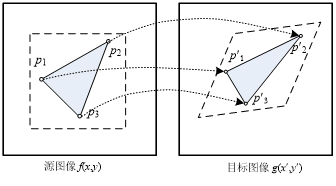

- 在仿射变换中，原图中所有的平行线在结果图像中同样平行。
- 为了创建这个矩阵，需要从原图像中找到三个点以及他们在输出图像中的位置，然后调用cv.getAffineTransform() 创建一个 2x3 的矩阵，再把这个矩阵传给函数 cv.warpAffine()进行仿射变换。
- cv.getAffineTransform(src, dst) → retval
    - Parameters:
    - src – Coordinates of triangle vertices in the source image.
    - dst – Coordinates of the corresponding triangle vertices in the destination image.
- dst=cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
    - parameters
    - src - input image.
    - dst - output image that has the size dsize and the same type as src .
    - M - 2×3 transformation matrix.
    - dsize - size of the output image.
    - flags - combination of interpolation methods (see InterpolationFlags) and the optional flag  WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
    - borderMode - pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
    - borderValue -value used in case of a constant border; by default, it is 0.


### 6.4.2 投影变换Perspective Transformation

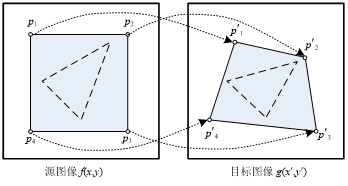
- 对于投影变换，需要一个 3x3 变换矩阵。在变换前后直线还是直线。
- 要构建这个变换矩阵，需要在输入图像上找 4 个点，以及他们在输出图像上对应的位置。这四个点中的任意三个都不能共线。然后调用函数函数 cv.getPerspectiveTransform()构建投影变换矩阵，再把这个矩阵传给函数cv.warpPerspective()。
- retval=cv.getPerspectiveTransform(src, dst[, solveMethod]); Calculates a perspective transform from four pairs of the corresponding points.
- dst=cv.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]);Applies a perspective transformation to an image.


## 示例：采用控制点的图像几何变换

In [ ]:
#OpenCV:采用控制点的图像几何变换--仿射变换/投影变换

#读入图像
imgdst_af = cv.imread('./imagedata/square_circle_af.bmp', 0)
imgdst_pe = cv.imread('./imagedata/square_circle_pe.bmp', 0)
img = cv.imread('./imagedata/square_circle.bmp', 0)

#获取源图像高/宽
rows,cols = img.shape

#确定仿射变换的3组控制点对，注意:水平(列)为x,垂直(行)为y
#源图像中标为1,2,3顶点像素的坐标
src1 = np.float32([[0, 0], [cols-1,0], [cols-1, rows-1]])
#源图像中标为1,2,3顶点像素，在期望输出图像中的对应坐标
dst1 = np.float32([[0, 160], [cols-1, 80], [360,rows-1]])
#估计仿射变换矩阵
Mat_af = cv.getAffineTransform(src1,dst1)
#施加仿射变换,采用后向映射
img_af = cv.warpAffine(img,Mat_af,(cols,rows),borderValue=125)

#确定投影变换的4组控制点对
#源图像中标为1,2,3,4顶点像素的坐标
src2 = np.float32([[0, 0], [cols -1,0], [cols -1,rows -1], [ 0,rows -1]])
#源图像中标为1,2,3,4顶点像素，在期望输出图像中的对应坐标
dst2 = np.float32([[0,160], [cols -1,80], [360,rows -1], [ 0,320]])
#估计投影变换矩阵
Mat_pe = cv.getPerspectiveTransform(src2,dst2)
#施加投影变换,采用后向映射
img_pe = cv.warpPerspective(img,Mat_pe,(cols,rows),borderValue=125)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#源图像
plt.subplot(2,3,1), plt.imshow(img,vmin=0,vmax=255)
plt.title('original image') 

#仿射变换期望控制点对位置
plt.subplot(2,3,2), plt.imshow(imgdst_af,vmin=0,vmax=255)
plt.title('Affine Transform,control points')
#透视变换期望控制点对位置
plt.subplot(2,3,3), plt.imshow(imgdst_pe,vmin=0,vmax=255)
plt.title('Perspective Transform,control points')  

#仿射变换结果
plt.subplot(2,3,5), plt.imshow(img_af,vmin=0,vmax=255)
plt.title('Affine Transform result')
#透视变换结果
plt.subplot(2,3,6), plt.imshow(img_pe,vmin=0,vmax=255)
plt.title('Perspective Transform result')   

plt.show()

### 示例：采用投影变换矫正图像畸变

In [ ]:
#OpenCV:采用控制点矫正图像的投影畸变
#读入图像
img_text = cv.imread('./imagedata/text.png', 0)

#确定投影变换的4组控制点对
#源图像中4个标“X”像素的坐标
src = np.float32([[155, 15], [65, 40], [260, 130], [360, 95]])
#标“X”控制点在期望输出图像中的对应坐标
dst = np.float32([[0, 0], [0, 50], [300, 50], [300, 0]])

#估计投影变换矩阵
Mat_pe = cv.getPerspectiveTransform(src,dst)
#施加投影变换,采用后向映射，输出图像宽300/高50
img_pe = cv.warpPerspective(img_text,Mat_pe,(300,50))

#显示结果
plt.figure(figsize=(8,5))
#源图像
plt.subplot(2,1,1); plt.imshow(img_text,cmap='gray')
plt.plot(src[:, 0], src[:, 1], 'xr',markersize=9,markeredgewidth=3)
plt.title('original image')
#投影变换矫正结果
plt.subplot(2,1,2); plt.imshow(img_pe,cmap='gray')
plt.title('Projective transformation correction') 

plt.show()

### 示例：QR二维码扫码识别 QR（Quick Response）code detection

In [ ]:
##OpenCV:QR二维码扫码识别

#读入一幅图像
img = cv.imread("./imagedata/qrcode_image.jpg")

#创建QR二维码检测器
qrcode_detector = cv.QRCodeDetector()
#检测图像中的二维码并解码
#返回解码信息,检测到的二维码四边形顶点下标,以及矫正后的二维码区域二值图像
data, vertices, rectified_qrcode_binarized = qrcode_detector.detectAndDecode(img)

#显示二维码检测及解码结果
if len(data) > 0:
    #显示解码信息
    print("解码信息: '{}'".format(data))
    #在输入图像上绘制检测到的二维码四边形
    pts = np.int32(vertices).reshape(-1, 2) 
    img = cv.polylines(img, [pts] , True, (0, 255, 0), 5)
    #用圆环标出二维码区域的四个顶点
    for j in range(pts.shape[0]):
        cv.circle(img, (pts[j,0],pts[j,1]), 10, (0, 0, 255), -1)
    
    #创建显示窗口
    plt.figure(figsize=(10,5))
    #plt.suptitle("QR code detection", fontsize=14, fontweight='bold')
    plt.gray()
    #显示检测到的二维码及解码信息
    plt.subplot(1,2,1), plt.imshow(img[:,:,::-1])
    plt.title("解码信息: " + data,fontsize=16)
    plt.axis('off')
    #显示矫正后的二维码区域二值图像
    plt.subplot(1,2,2), plt.imshow(np.uint8(rectified_qrcode_binarized))
    plt.title("矫正后的二维码",fontsize=16)
    plt.axis('off')
   
    plt.show()
else:
    print("QR Code not detected")

### 示例：采用Scikit-image 函数实现仿射变换和投影变换

In [ ]:
#Scikit-image：采用控制点的图像几何变换

#读入图像
imgdst_af = io.imread('./imagedata/square_circle_af.bmp')
imgdst_pe = io.imread('./imagedata/square_circle_pe.bmp')
img = io.imread('.\imagedata\square_circle.bmp')

#获取源图像f的高rows,宽cols
rows,cols = img.shape[0:2]

#确定仿射变换的3组控制点对,注意:水平(列)为x,垂直(行)为y
#原图像中标为1,2,3顶点像素的坐标
src1 = np.array([[0, 0], [cols-1,0], [cols-1, rows-1]])
#原图像中标为1,2,3顶点像素，在期望输出图像中的对应坐标
dst1 = np.array([[0, 160], [cols-1, 80], [360,rows-1]])
#定义仿射变换类对象
tform_af = transform.AffineTransform()
'''
#调用类成员函数估计仿射变换的前向映射矩阵
tform_af.estimate(src1, dst1)
#对仿射变换矩阵求逆，得到后向映射矩阵
tform_af.params = np.linalg.inv(tform_af.params)
'''
#调用类成员函数估计仿射变换的后向映射矩阵
tform_af.estimate(dst1, src1 )
#对图像施加上述仿射变换
img_warped_af = transform.warp(img, tform_af, output_shape=(rows, cols),cval=0.5)
img_warped_af = util.img_as_ubyte(img_warped_af)


#确定投影变换的4组控制点对
#原图像中标为1,2,3,4顶点像素的坐标
src2 = np.array([[0, 0], [cols -1,0], [cols -1,rows -1], [ 0,rows -1]])
#原图像中标为1,2,3,4顶点像素，在期望输出图像中的对应坐标
dst2 = np.array([[0,160], [cols -1,80], [360,rows -1], [ 0,320]])
#定义投影变换类对象
tform_pr = transform.ProjectiveTransform()
'''
#调用类成员函数估计投影变换的前向映射矩阵
tform_pr.estimate(src2, dst2)
#对投影变换矩阵求逆，得到后向映射矩阵
tform_pr.params = np.linalg.inv(tform_pr.params)
'''
#调用类成员函数估计投影变换的后向映射矩阵
tform_pr.estimate(dst2, src2)
#对图像施加上述投影变换
img_warped_pr = transform.warp(img, tform_pr, output_shape=(rows, cols),cval=0.5)
img_warped_pr = util.img_as_ubyte(img_warped_pr)

#显示结果
plt.figure(figsize=(16,8))
plt.gray()

#原图像
plt.subplot(2,3,1), plt.imshow(img,vmin=0,vmax=255)
plt.title('original image') 

#仿射变换期望控制点对位置
plt.subplot(2,3,2), plt.imshow(imgdst_af,vmin=0,vmax=255)
plt.title('Affine Transform,control points')
#透视变换期望控制点对位置
plt.subplot(2,3,3), plt.imshow(imgdst_pe,vmin=0,vmax=255)
plt.title('Perspective Transform,control points')  

#仿射变换结果
plt.subplot(2,3,5), plt.imshow(img_warped_af,vmin=0,vmax=255)
plt.title('Affine Transform result')
#投影变换结果
plt.subplot(2,3,6), plt.imshow(img_warped_pr,vmin=0,vmax=255)
plt.title('Perspective Transform result')   

plt.show()

### 示例： Scikit-image：采用控制点矫正图像的投影畸变

In [ ]:
#Scikit-image：采用控制点矫正图像的投影畸变

#读入图像
img_text = io.imread('./imagedata/text.png')

#确定投影变换的4组控制点对
#原图像中4个标"X"像素的坐标
src = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])
#与原图像中4个标"X"像素，在期望输出图像中的对应坐标
dst = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])

#定义投影变换类对象
tform_pr = transform.ProjectiveTransform()
'''
#调用类成员函数估计投影变换的前向映射矩阵
tform_pr.estimate(src, dst )
#对投影变换矩阵求逆，得到后向映射矩阵
tform_pr.params = np.linalg.inv(tform_pr.params)
'''
#调用类成员函数估计投影变换的后向映射矩阵
tform_pr.estimate(dst, src)
#对图像施加上述投影变换
img_warped = transform.warp(img_text, tform_pr, output_shape=(50, 300))
#将数据类型转换为uint8
img_warped = util.img_as_ubyte(img_warped)

#显示结果
plt.figure(figsize=(8,5))
plt.gray()

#输入图像
plt.subplot(2,1,1); plt.imshow(img_text,vmin=0,vmax=255)
plt.plot(src[:, 0], src[:, 1], 'xr',markersize=9,markeredgewidth=3)
plt.title('original image') 
#投影变换矫正结果
plt.subplot(2,1,2); plt.imshow(img_warped,vmin=0,vmax=255)
plt.title('Projective transformation correction') 

plt.show()

## 6.4.3 图像分片局部坐标变换 - Piecewise Affine Transformation
- This example shows how to use the Piecewise Affine Transformation.
- 2D piecewise affine transformation.
- Control points are used to define the mapping. The transform is based on a Delaunay triangulation（德劳内三角化网格） of the points to form a mesh. Each triangle is used to find a local affine transform.

In [ ]:
#采用Scikit-image分片仿射变换函数实现图像变形
#读入图像
img = io.imread('./imagedata/chelsea.png')
#获取图像的高/宽
rows, cols = img.shape[0:2]

#产生原图像三角化网格及其顶坐标，作为控制点
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

#对行坐标施加正弦波动，扭曲三角化网格，生成对应点
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows = 1.5*dst_rows
dst_rows =dst_rows - 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T

#定义分片仿射变换类对象
tform = transform.PiecewiseAffineTransform()
#调用类成员函数估计后向映射矩阵
tform.estimate(src,dst)
#对图像施加分片仿射变换
img_out =transform.warp(img, tform)

#显示结果
plt.figure(figsize=(12,8))
#输入图像
plt.subplot(2,2,1); plt.imshow(img)
plt.title('original image') 
#叠加网格点
plt.plot(src[:, 0], src[:, 1], '.y')

#分片仿射变换结果
plt.subplot(2,2,2); plt.imshow(img_out)
plt.title('Piecewise Affine Transformation') 
#叠加扭曲后的网格点
plt.subplot(2,2,3); plt.imshow(img_out)                               
plt.title('Piecewise Affine Transformation')                           
plt.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.r')

plt.show()

## 6.5 图像的非线性几何变换
- 图像的非线性几何变换将图像扭曲，以达到某种特殊效果。
- 对于非线性变换，通常很难获取从源图像到目标图像的前向映射变换函数。
- 一般采用后向映射，直接给出从目标图像到源图像的坐标变换函数。

### 6.5.1 旋转扭曲变换The swirl transformation
- Image swirling is a non-linear image deformation that creates a whirlpool effect. 

### 示例：旋涡变换The swirl transformation的编程实现

In [ ]:
#旋涡变换The swirl transformation

#读入图像
img = io.imread('./imagedata/coffee.png') # chessboard.png
#获取图像的高/宽
rows,cols = img.shape[0:2]

#设置变换参数
center = [cols/2, rows/2] # 旋转中心坐标
strength = 10     #最大涡旋强度(弧度)
radius = 350     #影响半径

#*******坐标变换********
#构造x,y坐标数组(x-列序,y-行序)
xy = np.indices((cols,rows),dtype=np.float32).reshape(2,-1).T
x, y = xy.T
x0, y0 = center
rho = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)

#确保在涡旋效应在影响半径内以大约1/1000-th速度衰减
radius = np.log(2)* radius / 5
theta = strength * np.exp(-rho / radius) + np.arctan2(y - y0, x - x0)
#计算坐标变换结果
xy[:,0] = x0 + rho * np.cos(theta)
xy[:,1] = y0 + rho * np.sin(theta)

#********灰度插值***********
#最近邻插值
xy = np.int16(np.floor(xy+0.5))
#计算图像边缘扩展参数
x_min,y_min = np.maximum(- np.min(xy,0),0)
x_max,y_max =  np.maximum(np.max(xy,0)-(cols,rows)+1,0)
if img.ndim == 2:
    pad_width = ((y_min,y_max),(x_min,x_max))
elif img.ndim == 3:
    pad_width = ((y_min,y_max),(x_min,x_max),(0,0))
#采用'edge'方式扩展图像
imgex = np.pad(img, pad_width,'edge')
#计算最近邻插值插值
img_result1 = imgex[xy[:,1]+y_min, xy[:,0]+x_min].reshape(img.shape,order = 'F')

#双线性插值
xy_0 = np.int16(np.floor(xy))
#计算图像边缘扩展参数
x_min,y_min = np.maximum(- np.min(xy_0,0),0)
x_max,y_max =  np.maximum(np.max(xy_0,0)-(cols,rows)+2,0)
if img.ndim == 2:
    pad_width = ((y_min,y_max),(x_min,x_max))
elif img.ndim == 3:
    pad_width = ((y_min,y_max),(x_min,x_max),(0,0))
    
#采用'edge'方式扩展图像  
imgex = np.pad(img, pad_width,'edge')

#计算双线性插值
dx = xy[:,0]-xy_0[:,0]
dy = xy[:,1]-xy_0[:,1]
if img.ndim ==3:
    dx = np.dstack((dx,dx,dx))
    dy = np.dstack((dy,dy,dy))
f00 = imgex[xy_0[:,1] + y_min,xy_0[:,0]+x_min].astype(float)
f10 = imgex[xy_0[:,1] + y_min,xy_0[:,0]+x_min+1].astype(float)  
f01 = imgex[xy_0[:,1] + y_min+1,xy_0[:,0]+x_min].astype(float)
f11 = imgex[xy_0[:,1] + y_min+1,xy_0[:,0]+x_min+1].astype(float)
img_result2 = (1-dx)*(1-dy)*f00+dx*(1-dy)*f10+(1-dx)*dy*f01+dx*dy*f11
#将数据类型由浮点型转换为uint8
img_result2 = np.uint8(img_result2.reshape(img.shape,order = 'F'))

#显示结果
plt.figure(figsize=(16,12))
plt.gray()

#输入图像
plt.subplot(1,3,1), plt.imshow(img,vmin=0,vmax=255)
plt.title('Input image') 
plt.axis('off')
#最近邻插值旋涡变换结果
plt.subplot(1,3,2), plt.imshow( img_result1,vmin=0,vmax=255)
plt.title('swirl image,nearest interpolation') 
plt.axis('off')
#双线性插值旋涡变换结果
plt.subplot(1,3,3), plt.imshow( img_result2,vmin=0,vmax=255)
plt.title('swirl image,bi-linear interpolation') 
plt.axis('off')

plt.show()

### 示例：调用Scikit-image中swirl函数实现

In [ ]:
#旋涡变换swirl transformation,调用Scikit-image中swirl函数实现

#读入一幅灰度图像
img_gray = io.imread('./imagedata/chessboard.png')

#swirl transformation
#加逆时针旋转np.pi/6
img_gray_swirled = transform.swirl(img_gray,rotation=np.pi/6, strength=10, radius=350)
#将数据类型由[]0,1]之间的浮点型转换为uint8
img_gray_swirled = util.img_as_ubyte(img_gray_swirled)

#读入一幅RGB彩色图像
img_rgb = io.imread('./imagedata/coffee.png') 
#swirl transformation
#无附加旋转
img_rgb_swirled = transform.swirl(img_rgb,rotation=0, strength=10, radius=350,mode='edge')
#将数据类型由[0,1]之间的浮点型转换为uint8
img_rgb_swirled = util.img_as_ubyte(img_rgb_swirled)

#显示结果
plt.figure(figsize=(12,8))
plt.gray()

#灰度图像
plt.subplot(2,2,1); plt.imshow(img_gray,vmin=0,vmax=255)
plt.title('Input image') 
plt.axis('off')
#灰度图像旋涡变换结果
plt.subplot(2,2,3); plt.imshow(img_gray_swirled,vmin=0,vmax=255)
plt.title('Gray image swirl transformation result') 
plt.axis('off')
#彩色图像
plt.subplot(2,2,2); plt.imshow(img_rgb)
plt.title('Input image') 
plt.axis('off')
#彩色图像旋涡变换结果
plt.subplot(2,2,4); plt.imshow(img_rgb_swirled)
plt.title('Color image swirl transformation result') 
plt.axis('off')

plt.show()

### 6.5.2 球面变换Spherical Transformation
### cv.remap(	src, map1, map2, interpolation[, dst[, borderMode[, borderValue]]]	) ->	dst
- interpolation：
 - cv.INTER_NEAREST - 最邻近插值
 - cv.INTER_LINEAR - 双线性插值
 - cv.INTER_CUBIC - 双立方插值
- borderMode:
 - cv.BORDER_REPLICATE：复制法，也就是复制最边缘像素。
 - cv.BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb
 - cv.BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
 - cv.BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg
 - cv.BORDER_CONSTANT：常量法，常数值填充，需要在函数中填入常数参数。

In [ ]:
#球面变换Spherical Transformation

#读入图像
img = io.imread('.\imagedata\Bridewedding.jpeg')
#获取图像的高/宽
rows,cols = img.shape[0:2]

#*******坐标变换********
#构造x,y坐标数组(x-列序,y-行序)
xy = np.indices((cols,rows),dtype=np.float32).reshape(2,-1).T

#设定透镜参数，x-列序,y-行序
xc = 292; yc = 179 #透镜中心位置
rmax = 150         #透镜半径
n=2.8              #透镜折射率

x, y = xy.T
dx = x - xc;  dx2 = dx * dx
dy = y - yc;  dy2 = dy * dy
rsq = (x - xc) ** 2 + (y - yc) ** 2
rho = np.sqrt(rsq)
 
alphax = np.zeros(x.shape)
alphay = np.zeros(x.shape)
t = np.zeros(x.shape)
#计算透镜半径范围内的像素坐标变换结果
pixsel = rho<rmax
alphax[pixsel] = (1-1/n)*np.arcsin(dx[pixsel]/np.sqrt(rmax * rmax - dy2[pixsel]))
alphay[pixsel] = (1-1/n)*np.arcsin(dy[pixsel]/np.sqrt(rmax * rmax - dx2[pixsel]))
#计算坐标变换结果                       
t[pixsel] = np.sqrt(rmax * rmax - rsq[pixsel])
xy[pixsel,0] = x[pixsel] - t[pixsel] * np.tan(alphax[pixsel])
xy[pixsel,1] = y[pixsel] - t[pixsel] * np.tan(alphay[pixsel])

#********灰度插值***********
# 双线性灰度插值
#采用OpenCV 函数cv.remap()实现双线性灰度插值
map_x = xy[:,0].reshape(img.shape[0:2],order = 'F')
map_y = xy[:,1].reshape(img.shape[0:2],order = 'F')
img_rst = cv.remap(img, map_x, map_y, interpolation = cv.INTER_LINEAR)

#最近邻灰度插值，查表法
xy = np.int16(np.floor(xy+0.5))
#计算图像边缘扩展参数
x_min,y_min = np.maximum(- np.min(xy,0),0)
x_max,y_max =  np.maximum(np.max(xy,0)-(cols,rows)+1,0)
if img.ndim == 2:
    pad_width = ((y_min,y_max),(x_min,x_max))
elif img.ndim == 3:
    pad_width = ((y_min,y_max),(x_min,x_max),(0,0))
#采用'edge'方式扩展图像
imgex = np.pad(img, pad_width,'edge')
#查表计算最近邻灰度插值
img_result = imgex[xy[:,1]+y_min,xy[:,0]+x_min].reshape(img.shape,order = 'F')

#显示结果
plt.figure(figsize=(12,5))
plt.gray()

#输入图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Input image') 
plt.axis('off')
#最近邻灰度插值球面变换结果
plt.subplot(1,3,2);plt.imshow(img_result,vmin=0,vmax=255)
plt.title('Spherical Transformation image,最近灰度邻插值') 
plt.axis('off')
#双线性灰度插值球面变换结果
plt.subplot(1,3,3);plt.imshow(img_rst,vmin=0,vmax=255)
plt.title('Spherical Transformation image,双线性灰度插值 ') 
plt.axis('off')

plt.tight_layout()
plt.show()

### 6.5.3 波浪扭曲变换 Ripple Transformation

In [ ]:
#波浪扭曲变换 Ripple Transformation

#读入图像
img = io.imread('.\imagedata\Bridewedding.jpeg')
#获取图像的高/宽
rows,cols = img.shape[0:2]

#设定波浪变换参数
ax = 20; ay = 30; tx = 50; ty = 20

#*******坐标变换********
#构造x,y坐标数组(x-列序,y-行序)
xy = np.indices((cols,rows),dtype=np.float32).reshape(2,-1).T
#计算坐标变换结果
x, y = xy.T
xy[:,0] = x + ax * np.sin(2 * np.pi * y/tx)
xy[:,1] = y + ay * np.sin(2 * np.pi * x/ty) 

#********灰度插值***********
# 双线性灰度插值
# 采用OpenCV 函数cv.remap()实现双线性灰度插值
map_x = xy[:,0].reshape(img.shape[0:2],order = 'F')
map_y = xy[:,1].reshape(img.shape[0:2],order = 'F')
img_rst = cv.remap(img, map_x, map_y, 
                   interpolation=cv.INTER_LINEAR,
                   borderMode=cv.BORDER_REPLICATE)
#最近邻插值
xy = np.int16(np.floor(xy+0.5))
#计算图像边缘扩展参数
x_min,y_min = np.maximum(- np.min(xy,0),0)
x_max,y_max =  np.maximum(np.max(xy,0)-(cols,rows)+1,0)
if img.ndim == 2:
    pad_width = ((y_min,y_max),(x_min,x_max))
elif img.ndim == 3:
    pad_width = ((y_min,y_max),(x_min,x_max),(0,0))
#采用'edge'方式扩展图像
imgex = np.pad(img, pad_width,'edge')
#计算最近邻插值插值
img_result = imgex[xy[:,1]+y_min,xy[:,0]+x_min].reshape(img.shape,order = 'F')

#显示结果
plt.figure(figsize=(12,6))
plt.gray()

#输入图像
plt.subplot(1,3,1); plt.imshow(img,vmin=0,vmax=255)
plt.title('Input image') 
plt.axis('off')
#最近邻插值灰度波浪扭曲变换结果
plt.subplot(1,3,2); plt.imshow( img_result,vmin=0,vmax=255)
plt.title('Ripple Transformation image最近邻灰度插值') 
plt.axis('off')
#双线性灰度插值波浪扭曲变换结果
plt.subplot(1,3,3);plt.imshow(img_rst,vmin=0,vmax=255)
plt.title('Ripple Transformation image,双线性灰度插值 ') 
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#OpenCV:采用控制点的图像几何变换--仿射变换/投影变换

#读入图像
im_src = cv.imread('imagedata/man_moon.png')
im_dst = cv.imread('imagedata/shutterstock.png')

#获取源图像高/宽
src_rows,src_cols = im_src.shape[0],im_src.shape[1]
#获取目标图像高/宽
dst_rows,dst_cols = im_dst.shape[0],im_dst.shape[1]


#确定投影变换的4组控制点对
#源图像4个顶点坐标(列，行),顺时针方向
src_pt = np.float32([[0, 0], [src_cols -1,0], [src_cols -1,src_rows -1], [ 0,src_rows -1]])
#源图像中标为1,2,3,4顶点像素，在期望输出图像中的对应坐标
dst_pt = np.float32([[74, 41], [272, 96], [272, 192], [72, 228]])
#估计投影变换矩阵
Mat_pe = cv.getPerspectiveTransform(src_pt,dst_pt)
#施加投影变换,采用后向映射
im_pe = cv.warpPerspective(im_src,Mat_pe,(dst_cols,dst_rows),borderValue=[0,0,0])

#dst_pt2 = np.array([[74, 41], [272, 96], [272, 192], [72, 228]],'int32')
#将目标图像指定区域填充为0
imt = im_dst.copy()
im_dst_masked = cv.fillPoly(imt, [dst_pt.astype(np.int32)], (0, 0, 0))

im_result = im_dst_masked + im_pe

#显示结果
plt.figure(figsize=(16,8))
#源图像
plt.subplot(2,3,1), plt.imshow(np.flip(im_src,2))
plt.title('Source image')
#待粘贴目标图像
plt.subplot(2,3,2), plt.imshow(np.flip(im_dst,2))
plt.title('Destination image') 
#透视变换结果
plt.subplot(2,3,3), plt.imshow(np.flip(im_pe,2))
plt.title('PerspectiveTransform result')
#将兴趣区域多边形填充0结果
plt.subplot(2,3,4), plt.imshow(np.flip(im_dst_masked,2))
plt.title('masked result') 
#最终结果
plt.subplot(2,3,5), plt.imshow(np.flip(im_result,2))
plt.title('Final result') 

plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(np.flip(im_src,2), cmap='gray'), plt.axis('off'), plt.title('Source image', size=30)
plt.subplot(122), plt.imshow(np.flip(im_result,2), cmap='gray'), plt.axis('off'), plt.title('Destination image', size=30)
plt.tight_layout()
plt.show()

In [ ]:
#OpenCV:采用控制点的图像几何变换--仿射变换/投影变换
#读入图像
from skimage.io import imread

im_src = imread('imagedata/painting.png')
im_dst = imread('imagedata/graffiti.png')
im_mask = imread('imagedata/graffiti_mask.png')

#获取源图像高/宽
src_rows,src_cols = im_src.shape[0],im_src.shape[1]
#获取目标图像高/宽
dst_rows,dst_cols = im_dst.shape[0],im_dst.shape[1]

#确定投影变换的4组控制点对
#源图像4个顶点坐标(列，行),顺时针方向
src_pt = np.float32([[0, 0], [src_cols -1,0], [src_cols -1,src_rows -1], [ 0,src_rows -1]])
#源图像中标为1,2,3,4顶点像素，在期望输出图像中的对应坐标
dst_pt = np.float32([[0, 0], [659, 0], [687, dst_rows-1], [0, dst_rows-1]])
#估计投影变换矩阵
Mat_pe = cv.getPerspectiveTransform(src_pt,dst_pt)
#施加投影变换,采用后向映射
im_pe = cv.warpPerspective(im_src,Mat_pe,(dst_cols,dst_rows),borderValue=[0,0,0])

#将目标图像指定区域填充为0
imt = im_dst.copy()
im_dst_masked = cv.fillPoly(imt, [dst_pt.astype(np.int32)], (0, 0, 0))
#获取画师区域
im_dst_painter = im_dst & im_mask
#将投影变换结果中的画师区域置颜色值为0
im_pet = im_pe.copy()
im_pet &= (~im_mask) 
#叠加得到最终结果
im_result = im_pet + im_dst_painter + im_dst_masked

#显示结果
plt.figure(figsize=(16,8))
#源图像
plt.subplot(2,3,1), plt.imshow(im_src)
plt.title('Source image')
#待粘贴目标图像
plt.subplot(2,3,2), plt.imshow(im_dst)
plt.title('Destination image') 
#透视变换结果
plt.subplot(2,3,3), plt.imshow(im_pe)
plt.title('PerspectiveTransform result')
#将兴趣区域多边形填充0结果
plt.subplot(2,3,4), plt.imshow(im_dst_masked)
plt.title('masked result') 
#提取的画师区域
plt.subplot(2,3,5), plt.imshow(im_dst_painter)
plt.title('painter ROI') 
#最终结果
plt.subplot(2,3,6), plt.imshow(im_result)
plt.title('Final result')
plt.show()

# The End